In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
#pip install seaborn

In [4]:
#pip install missingno

In [5]:
#pip install --upgrade pd

In [6]:
#pip install --upgrade np

In [7]:
#pip install --upgrade missingno

In [8]:
#pip install --upgrade sns

In [9]:
#pip freeze

# 1] Mise en place de l'environnement

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [11]:
CountrySeries = pd.read_csv('Projet_Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv',)
Country = pd.read_csv('Projet_Python_Dataset_Edstats_csv/EdStatsCountry.csv')
Data = pd.read_csv('Projet_Python_Dataset_Edstats_csv/EdStatsData.csv')
FootNote = pd.read_csv('Projet_Python_Dataset_Edstats_csv/EdStatsFootNote.csv')
Series = pd.read_csv('Projet_Python_Dataset_Edstats_csv/EdStatsSeries.csv')

# 2] Analyse pré-exploiratoire                                                                         
### Stratégie de l'entonoir appliquée
## 1. Comprendre la forme et la qualité des données à disposition
#### Nous commencçons par se donner une première impression de l'ensemble des documents en sytématisant notre démarche 

In [12]:
#Démarche systématique
#print(x)
#x.info()
#x.head(2)
#print((x.isnull().mean()).sort_values(ascending=[False]))
#x.duplicated(keep=False).sum()
#x.describe()
#msno.matrix(x[x.columns[0:100]])


#x.tail(5)
#x.shape
#x.dtypes
#x.count()

# EdStatsCountry-Series

In [13]:
#print(CountrySeries)

#1er regard, on observe rapidement beaucoup de NaN

In [14]:
#CountrySeries.info()

#2e regard, on identifie que la colonne Unnamed: 3 est complétement vide

In [15]:
#CountrySeries.head(2)


In [16]:
#print((CountrySeries.isnull().mean()).sort_values(ascending=[False]))

#Moyenne des valeurs manquantes par ordre décroissant (colonnes Unnamed 3 complétement vide)

In [17]:
#CountrySeries.duplicated(keep=False).sum()


In [133]:
#CountrySeries.describe()


,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [19]:
#msno.matrix(CountrySeries[CountrySeries.columns[0:4]])


# EdStatsCountry

In [20]:
#print (Country)


In [21]:
#Country.info()


In [22]:
#Country.head(2)


In [23]:
#print((Country.isnull().mean()).sort_values(ascending=[False]))


In [24]:
#Country.duplicated(keep=False).sum()


In [25]:
#Country.describe()


In [26]:
#msno.matrix(Country[Country.columns[0:32]])

# EdStatsData

In [27]:
#print (Data)


In [28]:
#Data.info()


In [29]:
#Data.head(2)


In [30]:
#print((Data.isnull().mean()).sort_values(ascending=[False]))


In [31]:
#Data.duplicated(keep=False).sum()


In [32]:
#Data.describe()


In [33]:
#msno.matrix(Data[Data.columns[3:71]])

In [34]:
#msno.matrix(Data[Data.columns[4:30]])
#msno.matrix(Data[Data.columns[30:50]])
#msno.matrix(Data[Data.columns[50:71]])


In [35]:
#msno.matrix(Data[Data.columns[41:50]])

# EdStatsFootNote

In [36]:
#print (FootNote)


In [37]:
#FootNote.info()


In [38]:
#FootNote.head(2)


In [39]:
#print((FootNote.isnull().mean()).sort_values(ascending=[False]))


In [40]:
#FootNote.duplicated(keep=False).sum()


In [41]:
#FootNote.describe()


In [42]:
#msno.matrix(FootNote[FootNote.columns[0:5]])


# EdStatsSeries

In [43]:
#print (Series)


In [44]:
#Series.head(2)


In [45]:
#Series.info()


In [46]:
#print((Series.isnull().mean()).sort_values(ascending=[False]))


In [47]:
#Series.duplicated(keep=False).sum()


In [48]:
#Series.describe()


In [49]:
#msno.matrix(Series[Series.columns[0:21]])


#### Les données sont inexploitables en l'état (grand nombre de données inconsistance pour notre étude, manque beaucoup de valeurs). Nous allons chercher à réduire la taille du jeu de donnée et cibler celles qui ont un intérêt pour notre étude.

## 2. Réduction du nombre de données par filtre successif :
#### 2.1 Sur les fichiers
#### Aucun doublon sur l'ensemble des fichiers
#### 2 fichiers csv apportent de la valeur pour notre analyse :
    - EdStatsCountry "Country" 
        Informations global sur chaque pays du monde
    - EdStatsData "Data"
        évolution des indicateurs par pays par années 
     
        - EdStatsCountry-Series
            source des données pour les informations contenues dans EdStatsCountry
        - EdStatsFootNote
            informations sur l’année d’origine et les incertitudes des données
        - EdStatsSeries
            informations sur les indicateurs du fichier EdStatsData

#### 2.2 Nous filtrerons ces fichiers pour avoir des données de qualité (complétude) avec une démarche itérative
#### Pour rappel, nous avons observer qu'aucun fichier ne présentait de doublon, expliquant notre focus sur la complétude.


##### 2.2.2 Sur les années 
##### 2.2.3 sur les indicateurs

##### 2.2.1 Sur les pays 

In [50]:
# Nous souhaitons sortir les pays qui ne sont pas rattaché à une région
region = ["North America", "Latin America & Caribbean", "Europe & Central Asia",
                        "Sub-Saharan Africa", "Middle East & North Africa", "East Asia & Pacific", "South Asia"]
Country = Country.drop(Country.loc[~Country.Region.isin(region)].index)

In [51]:
# Nous utilisons la selection des pays attaché à une région précedament réalisé 
Data = Data.drop(Data.loc[~Data["Country Code"].isin(Country["Country Code"])].index )

In [52]:
indicator_name = Data.groupby("Country Name").count()/len(Data[["Indicator Name"]])
# Nous cherchons à visualiser les valeurs disponible par année
indicator_name.head(2)

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.004673,0.004673,0.004673,0.000667,0.000177,0.000201,0.000301,0.000448,0.000685,0.000209,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Albania,0.004673,0.004673,0.004673,0.000521,0.000099,0.000094,0.000064,0.000064,0.000523,0.000134,...,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.0


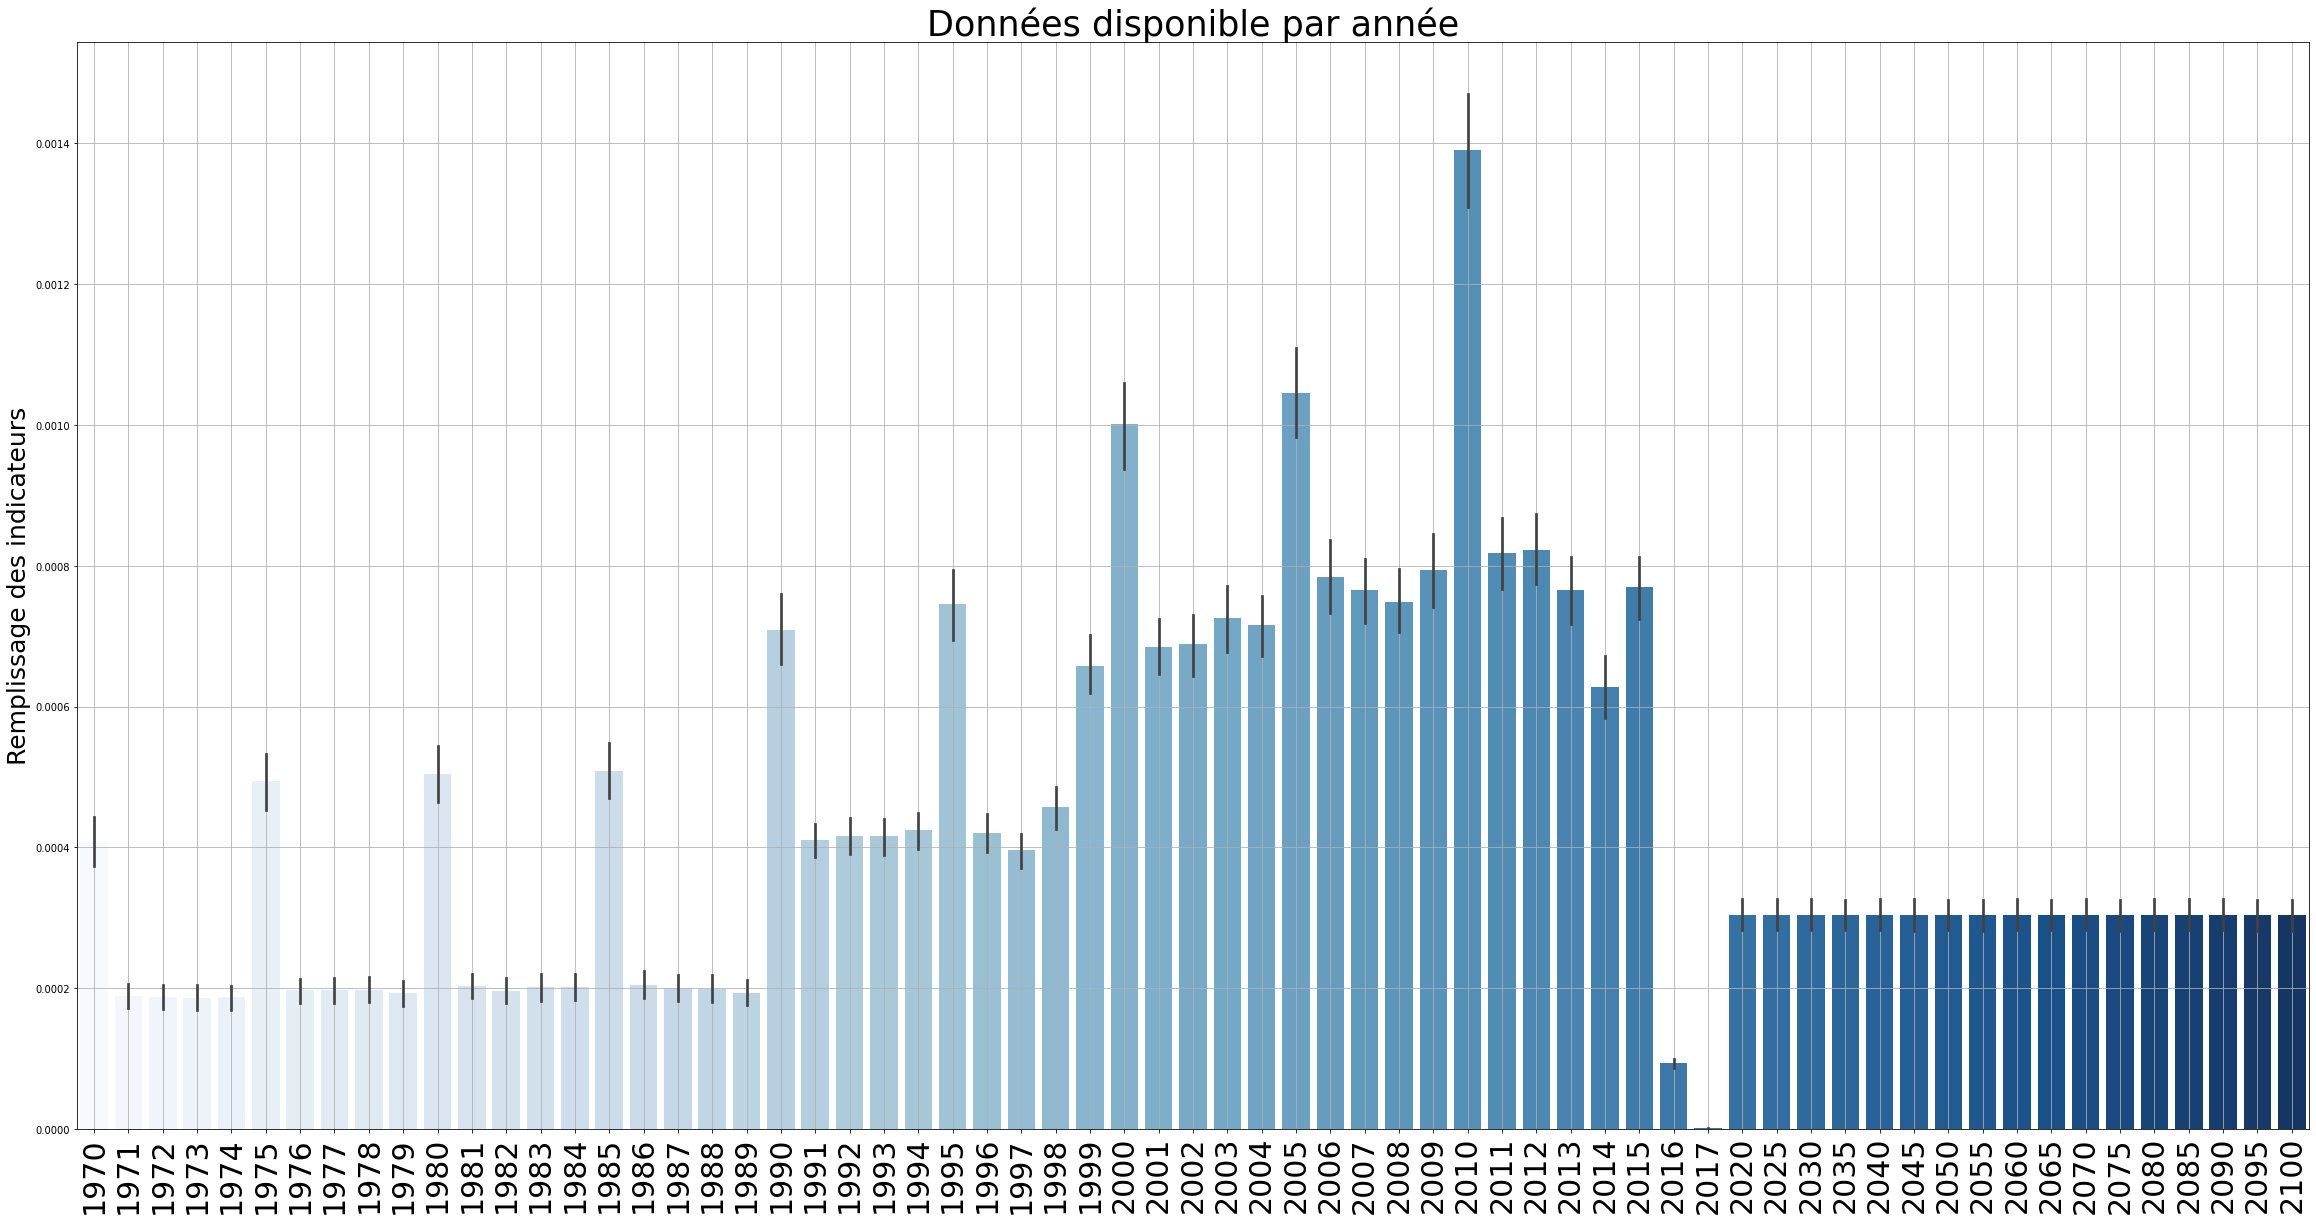

In [53]:
fig, ax = plt.subplots(figsize=(40,20))
#Traçons le taux de valeurs utilisables par années
sns.barplot(data=indicator_name[indicator_name.columns[3:-1]],palette="Blues")
plt.title("Données disponible par année",fontsize=35)
plt.ylabel("Remplissage des indicateurs",fontsize=25)
plt.xticks(fontsize=30,rotation = 90)
plt.grid()

In [54]:
#Cela confirme notre précedente analyse (Missingno) montrant que 2010 est l'année la plus rempli.
#Prenons 2010 comme point de référence et supprimons les autres années

In [55]:
Data = Data.drop(columns=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009','2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'])

In [56]:
data_heat = Data[['Country Name', 'Indicator Code', '2010']].pivot(index='Country Name',
                                                                   columns='Indicator Code',
                                                                   values='2010')

[]

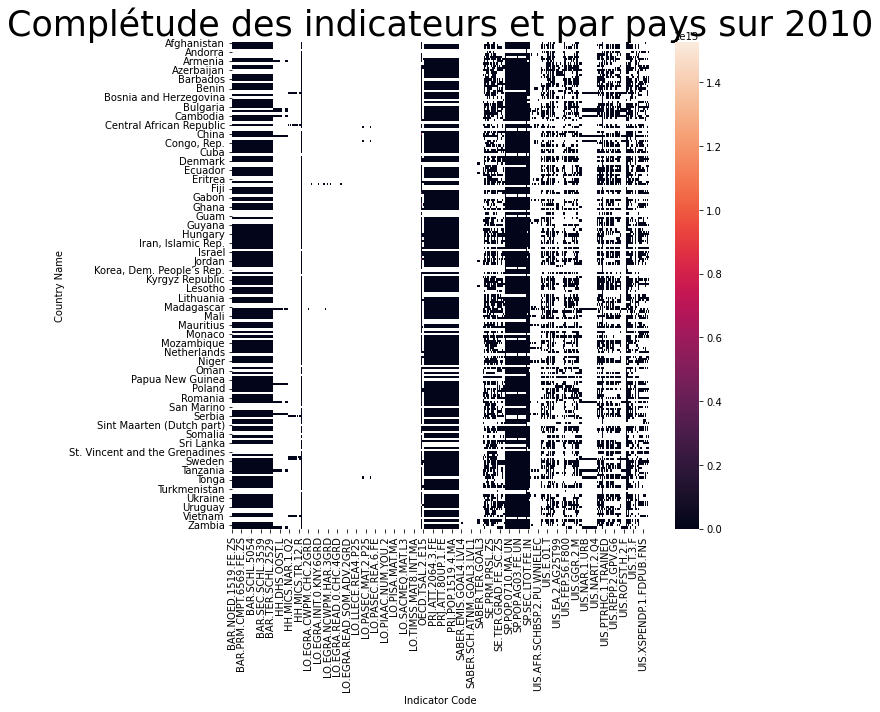

In [57]:
# Nous effectuons une heatmap pour visualiser la complétude des indicateurs pour l'année 2010 
# En noir = donnée manquante
plt.figure(figsize=(10,10))
plt.title('Complétude des indicateurs et par pays sur 2010',fontsize=35)
ax = sns.heatmap(data = data_heat)
plt.tight_layout()
plt.plot()

#### La visualisation n'est pas effective mais on constate qu'il a un manque de complétude   

In [58]:
Data["Indicator Code"].describe()

count         784310
unique          3665
top       UIS.NERA.2
freq             214
Name: Indicator Code, dtype: object

#### Nous utilisons une autre méthode pour réduire le nombre d'indicateurs. Nous utilisons une fonction (c for c) basé sur des mots clefs que nous avons défini pour l'intérêt de notre étude et filtrons ce que nous voulons voir et ce que nous excluons. 

In [59]:
data_indicator = [c for c in Data["Indicator Name"].drop_duplicates()
if ((("Population"in c)|
     ("GDP at market prices"in c)|("Enrolment in tertiary education"in c)|
     ("Mean years of schooling of the population"in c)
     |("Internet users"in c)|
     ("Enrolment in secondary"in c))
    and not 
    ( ("Barro-Lee" in c ) | ("Wittgenstein" in c )|("age" in c )|("ages" in c )|
    ("male" in c ) | ("female" in c) | ("gross" in c)| ("primary" in c))) ]

In [60]:
Data = Data.drop(Data.loc[~Data["Indicator Name"].isin(data_indicator)].index) 

In [61]:
Data["Indicator Code"].isna().sum()

0

#### Excellent résultat, nous tombons à 16 indicateurs ciblés intéressant pour notre étude et de sortir les NaN puisque nous avons fait une recherche par mots clefs.

In [62]:
Data.loc[Data["Country Name"]=="Andorra"]

,Country Name,Country Code,Indicator Name,Indicator Code,2010
107476,Andorra,AND,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,4.059000e+03
107478,Andorra,AND,"Enrolment in secondary education, private inst...",UIS.E.23.PR,8.300000e+01
107480,Andorra,AND,"Enrolment in secondary education, public insti...",UIS.E.23.PU,3.976000e+03
107482,Andorra,AND,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,3.692000e+03
107484,Andorra,AND,"Enrolment in secondary vocational, both sexes ...",SE.SEC.ENRL.VO,3.670000e+02
107486,Andorra,AND,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,NaN
107489,Andorra,AND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN
107491,Andorra,AND,"Enrolment in tertiary education, ISCED 5 progr...",UIS.E.5.B,NaN
107493,Andorra,AND,"Enrolment in tertiary education, ISCED 6 progr...",UIS.E.6,NaN
107495,Andorra,AND,"Enrolment in tertiary education, ISCED 7 progr...",UIS.E.7,NaN


In [63]:
# Nous souhaitons visualiser la complétude pour ces 16 indicateurs 

In [64]:
# Nous allons filtrer le nombres de pays pour ne retenir que les pays de plus d'1 million d'habitants

In [65]:
total_pop= Data.loc[(Data["Indicator Name"]=="Population, total") & (Data["2010"]>1_000_000)]

In [66]:
total_pop.loc[total_pop["Country Name"]=="France"]

,Country Name,Country Code,Indicator Name,Indicator Code,2010
339713,France,FRA,"Population, total",SP.POP.TOTL,65027512.0


In [67]:
Data = Data.drop(Data.loc[~Data["Country Name"].isin(total_pop["Country Name"])].index) 
#sans la spécification de la colonne "Country Name" pour la variable déclaré total_pop l'action était inopérante

In [68]:
print (total_pop)

              Country Name Country Code     Indicator Name Indicator Code  \
94158          Afghanistan          AFG  Population, total    SP.POP.TOTL   
97823              Albania          ALB  Population, total    SP.POP.TOTL   
101488             Algeria          DZA  Population, total    SP.POP.TOTL   
112483              Angola          AGO  Population, total    SP.POP.TOTL   
119813           Argentina          ARG  Population, total    SP.POP.TOTL   
...                    ...          ...                ...            ...   
867473             Vietnam          VNM  Population, total    SP.POP.TOTL   
874803  West Bank and Gaza          PSE  Population, total    SP.POP.TOTL   
878468         Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   
882133              Zambia          ZMB  Population, total    SP.POP.TOTL   
885798            Zimbabwe          ZWE  Population, total    SP.POP.TOTL   

              2010  
94158   28803167.0  
97823    2913021.0  
101488  3611

In [69]:
print (Data)

       Country Name Country Code  \
92816   Afghanistan          AFG   
92818   Afghanistan          AFG   
92820   Afghanistan          AFG   
92822   Afghanistan          AFG   
92824   Afghanistan          AFG   
...             ...          ...   
884507     Zimbabwe          ZWE   
884508     Zimbabwe          ZWE   
884640     Zimbabwe          ZWE   
885572     Zimbabwe          ZWE   
885798     Zimbabwe          ZWE   

                                           Indicator Name  Indicator Code  \
92816   Enrolment in secondary education, both sexes (...     SE.SEC.ENRL   
92818   Enrolment in secondary education, private inst...     UIS.E.23.PR   
92820   Enrolment in secondary education, public insti...     UIS.E.23.PU   
92822   Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
92824   Enrolment in secondary vocational, both sexes ...  SE.SEC.ENRL.VO   
...                                                   ...             ...   
884507           GDP at mark

In [70]:
Data.duplicated().sum()

0

In [71]:
Data.nunique()

Country Name       158
Country Code       158
Indicator Name      16
Indicator Code      16
2010              1570
dtype: int64

In [72]:
total_pop.nunique()

Country Name      158
Country Code      158
Indicator Name      1
Indicator Code      1
2010              158
dtype: int64

In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 92816 to 885798
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2528 non-null   object 
 1   Country Code    2528 non-null   object 
 2   Indicator Name  2528 non-null   object 
 3   Indicator Code  2528 non-null   object 
 4   2010            1760 non-null   float64
dtypes: float64(1), object(4)
memory usage: 118.5+ KB


In [74]:
Data.loc[Data["Indicator Code"]=='SP.POP.TOTL']

,Country Name,Country Code,Indicator Name,Indicator Code,2010
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28803167.0
97823,Albania,ALB,"Population, total",SP.POP.TOTL,2913021.0
101488,Algeria,DZA,"Population, total",SP.POP.TOTL,36117637.0
112483,Angola,AGO,"Population, total",SP.POP.TOTL,23369131.0
119813,Argentina,ARG,"Population, total",SP.POP.TOTL,41223889.0
...,...,...,...,...,...
867473,Vietnam,VNM,"Population, total",SP.POP.TOTL,86932500.0
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,3811102.0
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,23606779.0
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,13850033.0


In [75]:
indicateur = Data.groupby("Indicator Name").count()/len(Data[["Country Name"]].drop_duplicates())*100
indicateur.sort_values(by=["2010"],ascending=False)
# nous visualisons la complétude des 16 indicateurs pour 2010

,Country Name,Country Code,Indicator Code,2010
Indicator Name,,,,
Population growth (annual %),100.0,100.0,100.0,100.000000
"Population, total",100.0,100.0,100.0,100.000000
GDP at market prices (current US$),100.0,100.0,100.0,98.101266
Internet users (per 100 people),100.0,100.0,100.0,98.101266
GDP at market prices (constant 2005 US$),100.0,100.0,100.0,97.468354
"Enrolment in secondary general, both sexes (number)",100.0,100.0,100.0,79.113924
"Enrolment in secondary education, both sexes (number)",100.0,100.0,100.0,75.316456
"Enrolment in tertiary education, all programmes, both sexes (number)",100.0,100.0,100.0,75.316456
"Enrolment in tertiary education per 100,000 inhabitants, both sexes",100.0,100.0,100.0,73.417722


In [76]:
#Nous retenons les plus intéressant avec la meilleur complétude en prenant les codes indicateurs pour 
# éviter les erreurs
indicateur=  [
            'SP.POP.TOTL',    
            'SP.POP.GROW',
            'NY.GDP.MKTP.CD',
            'IT.NET.USER.P2',
            'SE.SEC.ENRL.GC',
            'SE.TER.ENRL',
            ]

In [77]:
Data = Data.drop(Data.loc[~Data["Indicator Code"].isin(indicateur)].index) 

In [78]:
Data.loc[Data["Indicator Code"]=='SP.POP.TOTL']

,Country Name,Country Code,Indicator Name,Indicator Code,2010
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28803167.0
97823,Albania,ALB,"Population, total",SP.POP.TOTL,2913021.0
101488,Algeria,DZA,"Population, total",SP.POP.TOTL,36117637.0
112483,Angola,AGO,"Population, total",SP.POP.TOTL,23369131.0
119813,Argentina,ARG,"Population, total",SP.POP.TOTL,41223889.0
...,...,...,...,...,...
867473,Vietnam,VNM,"Population, total",SP.POP.TOTL,86932500.0
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,3811102.0
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,23606779.0
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,13850033.0


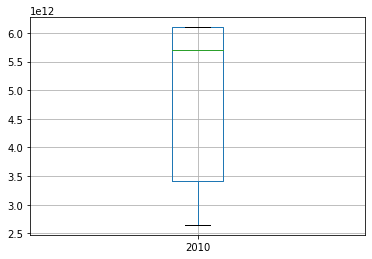

In [80]:
richesse.boxplot("2010",showfliers=False);

In [79]:
richesse = Data.loc[(Data["Indicator Name"]==
                     "GDP at market prices (current US$)")].sort_values("2010", ascending=False).head(5)
richesse

,Country Name,Country Code,Indicator Name,Indicator Code,2010
847858,United States,USA,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.496437e+13
243133,China,CHN,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.100620e+12
448373,Japan,JPN,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.700098e+12
356748,Germany,DEU,GDP at market prices (current US$),NY.GDP.MKTP.CD,3.417095e+12
338423,France,FRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.646837e+12


In [236]:
internet = Data.loc[(Data["Indicator Name"]=="Internet users (per 100 people)")].sort_values(
    "2010", ascending=False).head(5)
internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010
628090,Norway,NOR,Internet users (per 100 people),IT.NET.USER.P2,93.39
602435,Netherlands,NLD,Internet users (per 100 people),IT.NET.USER.P2,90.72
778355,Sweden,SWE,Internet users (per 100 people),IT.NET.USER.P2,90.00
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,88.72
334890,Finland,FIN,Internet users (per 100 people),IT.NET.USER.P2,86.89


In [233]:
secondary = Data.loc[(Data["Indicator Code"]=='SE.SEC.ENRL.GC')].sort_values("2010", ascending=False).head(5)
secondary

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
dtype: int64

In [234]:
tertiary = Data.loc[(Data["Indicator Code"]=='SE.TER.ENRL')].sort_values("2010", ascending=False).head(5)
tertiary

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
dtype: int64

In [235]:
population = Data.loc[(Data["Indicator Code"]=='SP.POP.TOTL')].sort_values("2010", ascending=False).head(5)
population

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
dtype: int64

Text(0.5, 1.0, 'Population par pays en 2010')

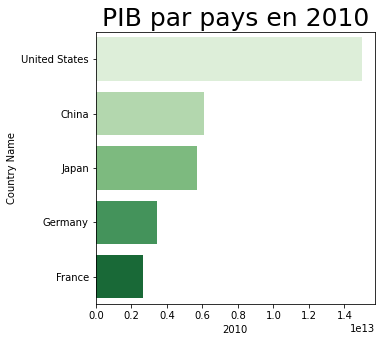

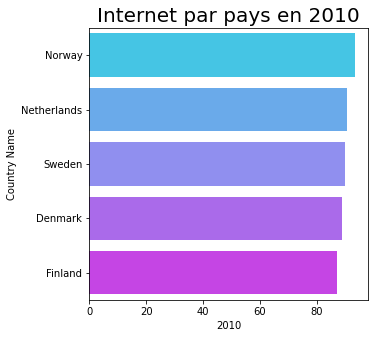

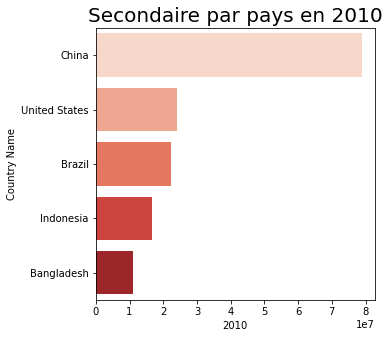

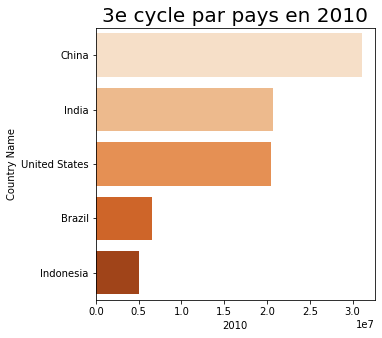

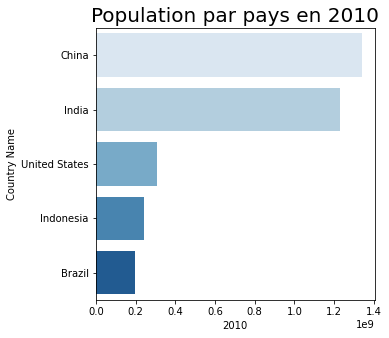

In [255]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=richesse["2010"], y= richesse["Country Name"],palette="Greens");
 
plt.title("PIB par pays en 2010",fontsize=25)



fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=internet["2010"], y= internet["Country Name"],palette="cool");
plt.title("Internet par pays en 2010",fontsize=20)

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=secondary["2010"], y= secondary["Country Name"],palette="Reds");
plt.title("Secondaire par pays en 2010",fontsize=20)

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=tertiary["2010"], y= tertiary["Country Name"],palette="Oranges");
plt.title("3e cycle par pays en 2010",fontsize=20)

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=population["2010"], y= population["Country Name"],palette="Blues");
plt.title("Population par pays en 2010",fontsize=20)

In [86]:
#Nous rassemblons les top 10 des degrés d'éducation avec concat
frames = [secondary, tertiary]

education = pd.concat(frames)
education

,Country Name,Country Code,Indicator Name,Indicator Code,2010
243087,China,CHN,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,78798728.0
847812,United States,USA,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,24192786.0
188112,Brazil,BRA,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,22215054.0
419007,Indonesia,IDN,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,16656848.0
147797,Bangladesh,BGD,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,10961531.0
243094,China,CHN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,31046736.0
415349,India,IND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,20740740.0
847819,United States,USA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,20427708.0
188119,Brazil,BRA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6552707.0
419014,Indonesia,IDN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5001048.0


Text(0.5, 1.0, 'Scolarité supérieur par pays en 2010')

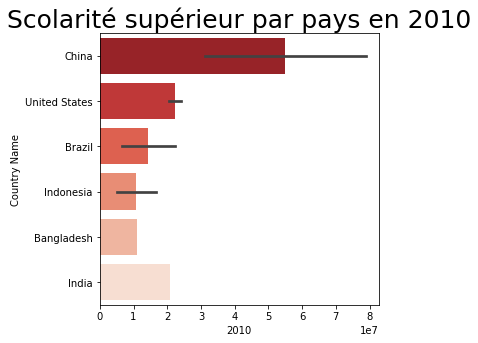

In [87]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=education["2010"], y= education["Country Name"],palette="Reds_r");
plt.title("Scolarité supérieur par pays en 2010",fontsize=25)

In [88]:
#Nous rassemblons l'essemble des top 10 avec concat
frames = [richesse, education, internet, population]

score = pd.concat(frames).sort_values("2010", ascending=False)
score

,Country Name,Country Code,Indicator Name,Indicator Code,2010
847858,United States,USA,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.496437e+13
243133,China,CHN,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.100620e+12
448373,Japan,JPN,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.700098e+12
356748,Germany,DEU,GDP at market prices (current US$),NY.GDP.MKTP.CD,3.417095e+12
338423,France,FRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.646837e+12
244423,China,CHN,"Population, total",SP.POP.TOTL,1.337705e+09
416678,India,IND,"Population, total",SP.POP.TOTL,1.230981e+09
849148,United States,USA,"Population, total",SP.POP.TOTL,3.093482e+08
420343,Indonesia,IDN,"Population, total",SP.POP.TOTL,2.425241e+08
189448,Brazil,BRA,"Population, total",SP.POP.TOTL,1.967963e+08


In [89]:
score = score.drop(columns=["Country Code","Indicator Code"])

In [90]:
score = score.reset_index(drop=True)

In [253]:
score

,Country Name,Indicator Name,2010,prospect
0,United States,GDP at market prices (current US$),1.496437e+13,NaN
1,China,GDP at market prices (current US$),6.100620e+12,NaN
2,Japan,GDP at market prices (current US$),5.700098e+12,NaN
3,Germany,GDP at market prices (current US$),3.417095e+12,NaN
4,France,GDP at market prices (current US$),2.646837e+12,NaN
5,China,"Population, total",1.337705e+09,NaN
6,India,"Population, total",1.230981e+09,NaN
7,United States,"Population, total",3.093482e+08,NaN
8,Indonesia,"Population, total",2.425241e+08,NaN
9,Brazil,"Population, total",1.967963e+08,NaN


In [95]:
poptotal = score.loc[(score["Indicator Name"]=='Population, total')].sort_values("2010", ascending=False).head(5)
poptotal

,Country Name,Indicator Name,2010
5,China,"Population, total",1.337705e+09
6,India,"Population, total",1.230981e+09
7,United States,"Population, total",3.093482e+08
8,Indonesia,"Population, total",2.425241e+08
9,Brazil,"Population, total",1.967963e+08


In [249]:
score.loc[score["Indicator Name"]=="Internet users (per 100 people)",["2010"]] 

,2010
20,93.39
21,90.72
22,90.00
23,88.72
24,86.89


In [79]:
richesse = Data.loc[(Data["Indicator Name"]==
                     "GDP at market prices (current US$)")].sort_values("2010", ascending=False).head(5)
richesse

,Country Name,Country Code,Indicator Name,Indicator Code,2010
847858,United States,USA,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.496437e+13
243133,China,CHN,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.100620e+12
448373,Japan,JPN,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.700098e+12
356748,Germany,DEU,GDP at market prices (current US$),NY.GDP.MKTP.CD,3.417095e+12
338423,France,FRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.646837e+12


In [236]:
internet = Data.loc[(Data["Indicator Name"]=="Internet users (per 100 people)")].sort_values(
    "2010", ascending=False).head(5)
internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010
628090,Norway,NOR,Internet users (per 100 people),IT.NET.USER.P2,93.39
602435,Netherlands,NLD,Internet users (per 100 people),IT.NET.USER.P2,90.72
778355,Sweden,SWE,Internet users (per 100 people),IT.NET.USER.P2,90.00
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,88.72
334890,Finland,FIN,Internet users (per 100 people),IT.NET.USER.P2,86.89


In [233]:
secondary = Data.loc[(Data["Indicator Code"]=='SE.SEC.ENRL.GC')].sort_values("2010", ascending=False).head(5)
secondary

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
dtype: int64

In [234]:
tertiary = Data.loc[(Data["Indicator Code"]=='SE.TER.ENRL')].sort_values("2010", ascending=False).head(5)
tertiary

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
dtype: int64

In [235]:
population = Data.loc[(Data["Indicator Code"]=='SP.POP.TOTL')].sort_values("2010", ascending=False).head(5)
population

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
dtype: int64

In [96]:
pib = score.loc[(score["Indicator Name"]=='GDP at market prices (current US$)')].sort_values("2010", ascending=False).head(5)
pib

,Country Name,Indicator Name,2010
0,United States,GDP at market prices (current US$),1.496437e+13
1,China,GDP at market prices (current US$),6.100620e+12
2,Japan,GDP at market prices (current US$),5.700098e+12
3,Germany,GDP at market prices (current US$),3.417095e+12
4,France,GDP at market prices (current US$),2.646837e+12


In [290]:
#nous souhaitons crée un indicateur de scoring en croisant les différents indicateurs déjà retenus
#Indicateur : (lycéen+universitaire)*Internet*(pib/population totale)
#Nous ajoutons la valeur de ce nouvel indicateur dans la colonne "prospect"
score["prospect"] = (score.loc[score["Indicator Name"]=='Enrolment in upper secondary general, both sexes (number)'],"2010" +(score.loc[score["Indicator Name"]=='Enrolment in tertiary education, all programmes, both sexes (number)'],"2010"))*score.loc[score["Indicator Name"]=="Internet users (per 100 people)"],"2010"//score.loc[(score["Indicator Name"]=="GDP at market prices (current US$)"],"2010")

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1489772224.py, line 4)

In [303]:
score["prospect"] = [(d+c)*((a//e)*b)]

TypeError: unsupported operand type(s) for //: 'tuple' and 'tuple'

In [302]:
score["prospect"] = (d+c)*(a*b)

TypeError: can't multiply sequence by non-int of type 'tuple'

In [292]:
a = score.loc[score["Indicator Name"]=="GDP at market prices (current US$)"],"2010"

In [293]:
b = score.loc[score["Indicator Name"]=="Internet users (per 100 people)"],"2010"

In [294]:
c = score.loc[score["Indicator Name"]=='Enrolment in tertiary education, all programmes, both sexes (number)'],"2010"

In [295]:
d = score.loc[score["Indicator Name"]=='Enrolment in upper secondary general, both sexes (number)'],"2010"

In [296]:
e = score.loc[score["Indicator Name"]=='Population, total'],"2010"

In [286]:
#nous souhaitons crée un indicateur de scoring en croisant les différents indicateurs déjà retenus
#Indicateur : (lycéen+universitaire)*Internet*(pib/population totale)
#Nous ajoutons la valeur de ce nouvel indicateur dans la colonne "prospect"
score["prospect"] = score.loc[score["Indicator Name"]=='Enrolment in upper secondary general, both sexes(number)'],"2010" 

(Empty DataFrame
 Columns: [Country Name, Indicator Name, 2010, prospect]
 Index: [],
 '2010')

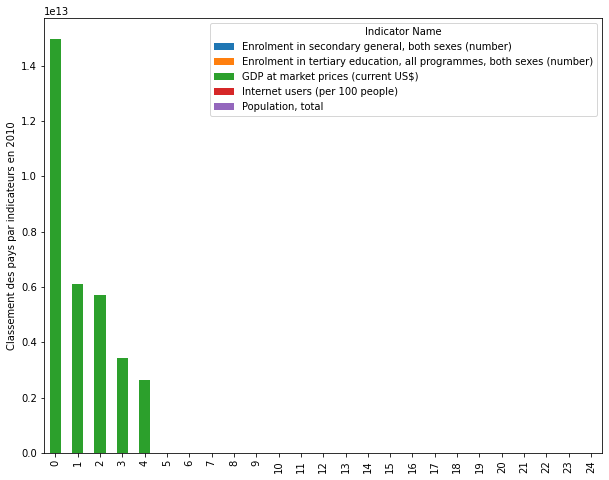

In [137]:
plot_score = score.set_index('Indicator Name',append=True)['2010'].unstack()
plot_score['Total'] = plot_score.apply('sum', axis=1)

plot_score.sort_values('Total', ascending=False)\
       .drop(columns=['Total'])\
       .plot(kind="bar", stacked=True, figsize=(10,8))

plt.ylabel('Classement des pays par indicateurs en 2010')
plt.show()

In [127]:
sns.barplot(x=score["2010"], y= score,palette="cool");
plt.title("Internet par pays en 2010",fontsize=25)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Il nous reste à savoir au travers de seaborn : 
# - pays les plus riche 
# - avec les plus d'étudiants de lycée et université 
# - avec les meilleurs connaissances informatique 
# - investissenssant le plus dans l'éducation

In [ ]:
# Puis faire des projections sur le potentie’l prospects : 
# - augmentation de population
# - de la richesse 
# - connaissance informatique

In [230]:
score.nunique()

Country Name      14
Indicator Name     5
2010              25
dtype: int64

In [252]:
score['prospect'] = internet["2010"] * secondary["2010"] * tertiary["2010"] 
score

,Country Name,Indicator Name,2010,prospect
0,United States,GDP at market prices (current US$),1.496437e+13,NaN
1,China,GDP at market prices (current US$),6.100620e+12,NaN
2,Japan,GDP at market prices (current US$),5.700098e+12,NaN
3,Germany,GDP at market prices (current US$),3.417095e+12,NaN
4,France,GDP at market prices (current US$),2.646837e+12,NaN
5,China,"Population, total",1.337705e+09,NaN
6,India,"Population, total",1.230981e+09,NaN
7,United States,"Population, total",3.093482e+08,NaN
8,Indonesia,"Population, total",2.425241e+08,NaN
9,Brazil,"Population, total",1.967963e+08,NaN


In [141]:
Data2 = pd.read_csv('Projet_Python_Dataset_Edstats_csv/EdStatsData.csv')

In [ ]:
pays = ['China',"United States","Brazil","Indonesia","India"]
Data2  = Data2.drop(Data2.loc[~Data2.Region.isin(region)].index)

Data = Data.drop(Data.loc[~Data["Country Code"].isin(Country["Country Code"])].index )

In [154]:
china = Data2.loc[(Data2["Country Name"]=="China")]

In [155]:
china

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
241890,China,CHN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241891,China,CHN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241892,China,CHN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241893,China,CHN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241894,China,CHN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245550,China,CHN,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245551,China,CHN,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245552,China,CHN,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245553,China,CHN,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
china = china.drop(china.loc[~china["Indicator Code"].isin(indicateur)].index) 

In [165]:
china

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
243087,China,CHN,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,2.021490e+07,2.641850e+07,3.127610e+07,3.582440e+07,3.446430e+07,3.650360e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243094,China,CHN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.086170e+05,NaN,NaN,1.937190e+05,3.136450e+05,4.299810e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243133,China,CHN,GDP at market prices (current US$),NY.GDP.MKTP.CD,9.260297e+10,9.980096e+10,1.136876e+11,1.385443e+11,1.441821e+11,1.634316e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243265,China,CHN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244197,China,CHN,Population growth (annual %),SP.POP.GROW,2.761676e+00,2.746916e+00,2.457357e+00,2.283395e+00,2.065955e+00,1.766392e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244423,China,CHN,"Population, total",SP.POP.TOTL,8.183150e+08,8.411050e+08,8.620300e+08,8.819400e+08,9.003500e+08,9.163950e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
china.loc[(china["Indicator Name"]=="Internet users (per 100 people)")]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
243265,China,CHN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Scolarité supérieur par pays en 2010')

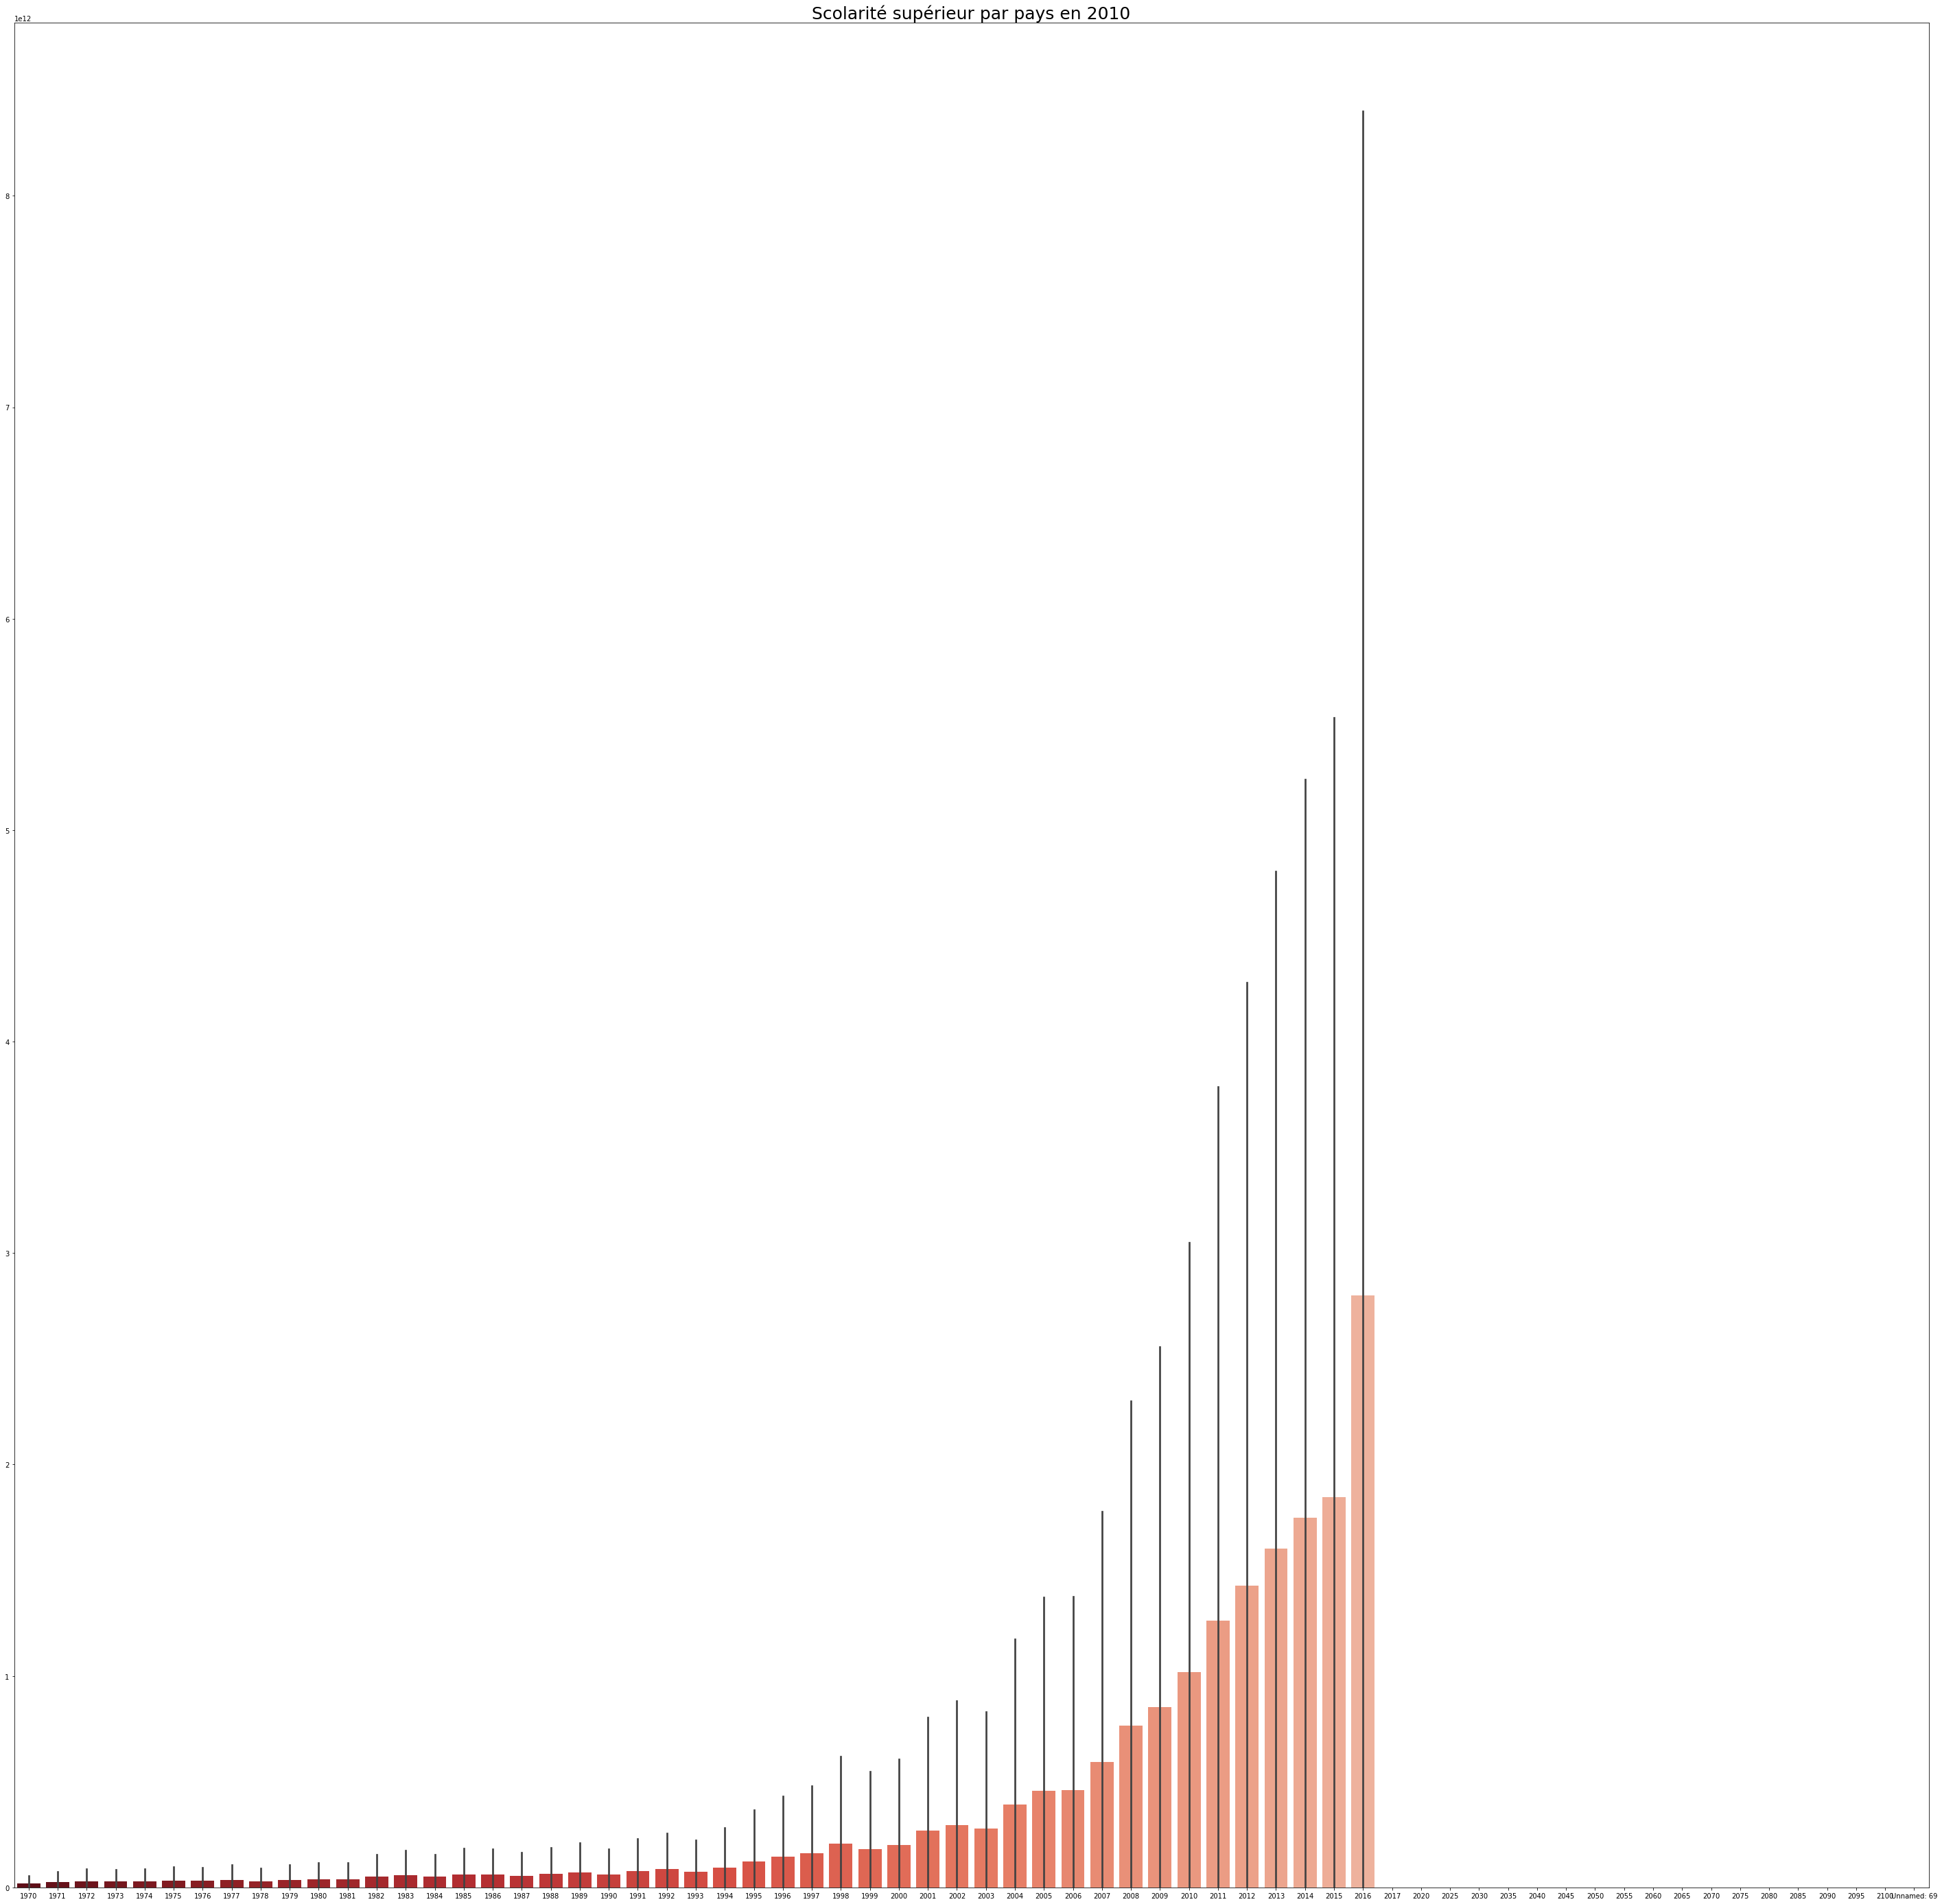

In [225]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.barplot(data = china,palette="Reds_r");
plt.title("Scolarité supérieur par pays en 2010",fontsize=25)

<AxesSubplot:>

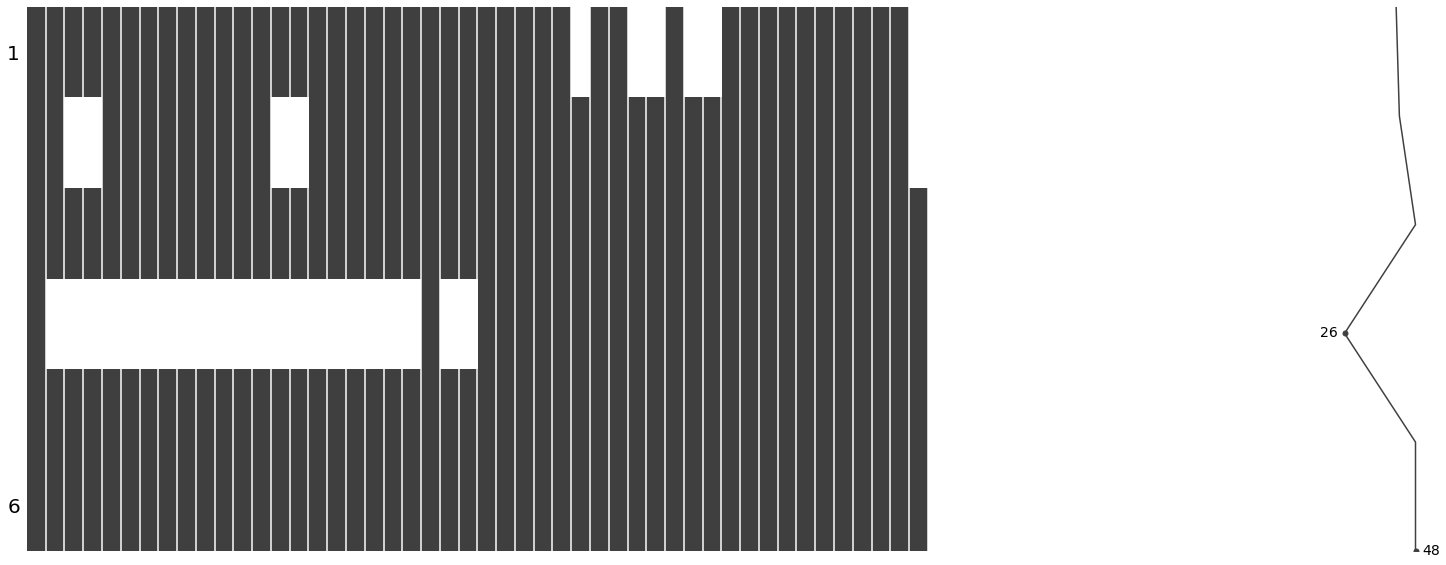

In [200]:
msno.matrix(china[china.columns[3:]])

In [210]:
x = Data.loc[(Data["Indicator Name"]=="Internet users (per 100 people)")]

In [211]:
y = Data.loc[(Data["Indicator Code"]=='SE.TER.ENRL')]

In [212]:
z = Data.loc[(Data["Indicator Code"]=='SE.SEC.ENRL.GC')]

In [213]:
w = Data.loc[(Data["Indicator Code"]=='SP.POP.TOTL')]

In [214]:
def prospect (x,y,z,w):
    q=x*(y+z)
    return q